In [ ]:
# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

import scipy

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
from pylab import rcParams
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Dataset
df_fna = pd.read_csv('/content/drive/MyDrive/613 Capstone/Data_MissingValuesHandled.csv')
df_fna.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


sns.pairplot(df_fna, hue='is_promoted', size=1.5);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


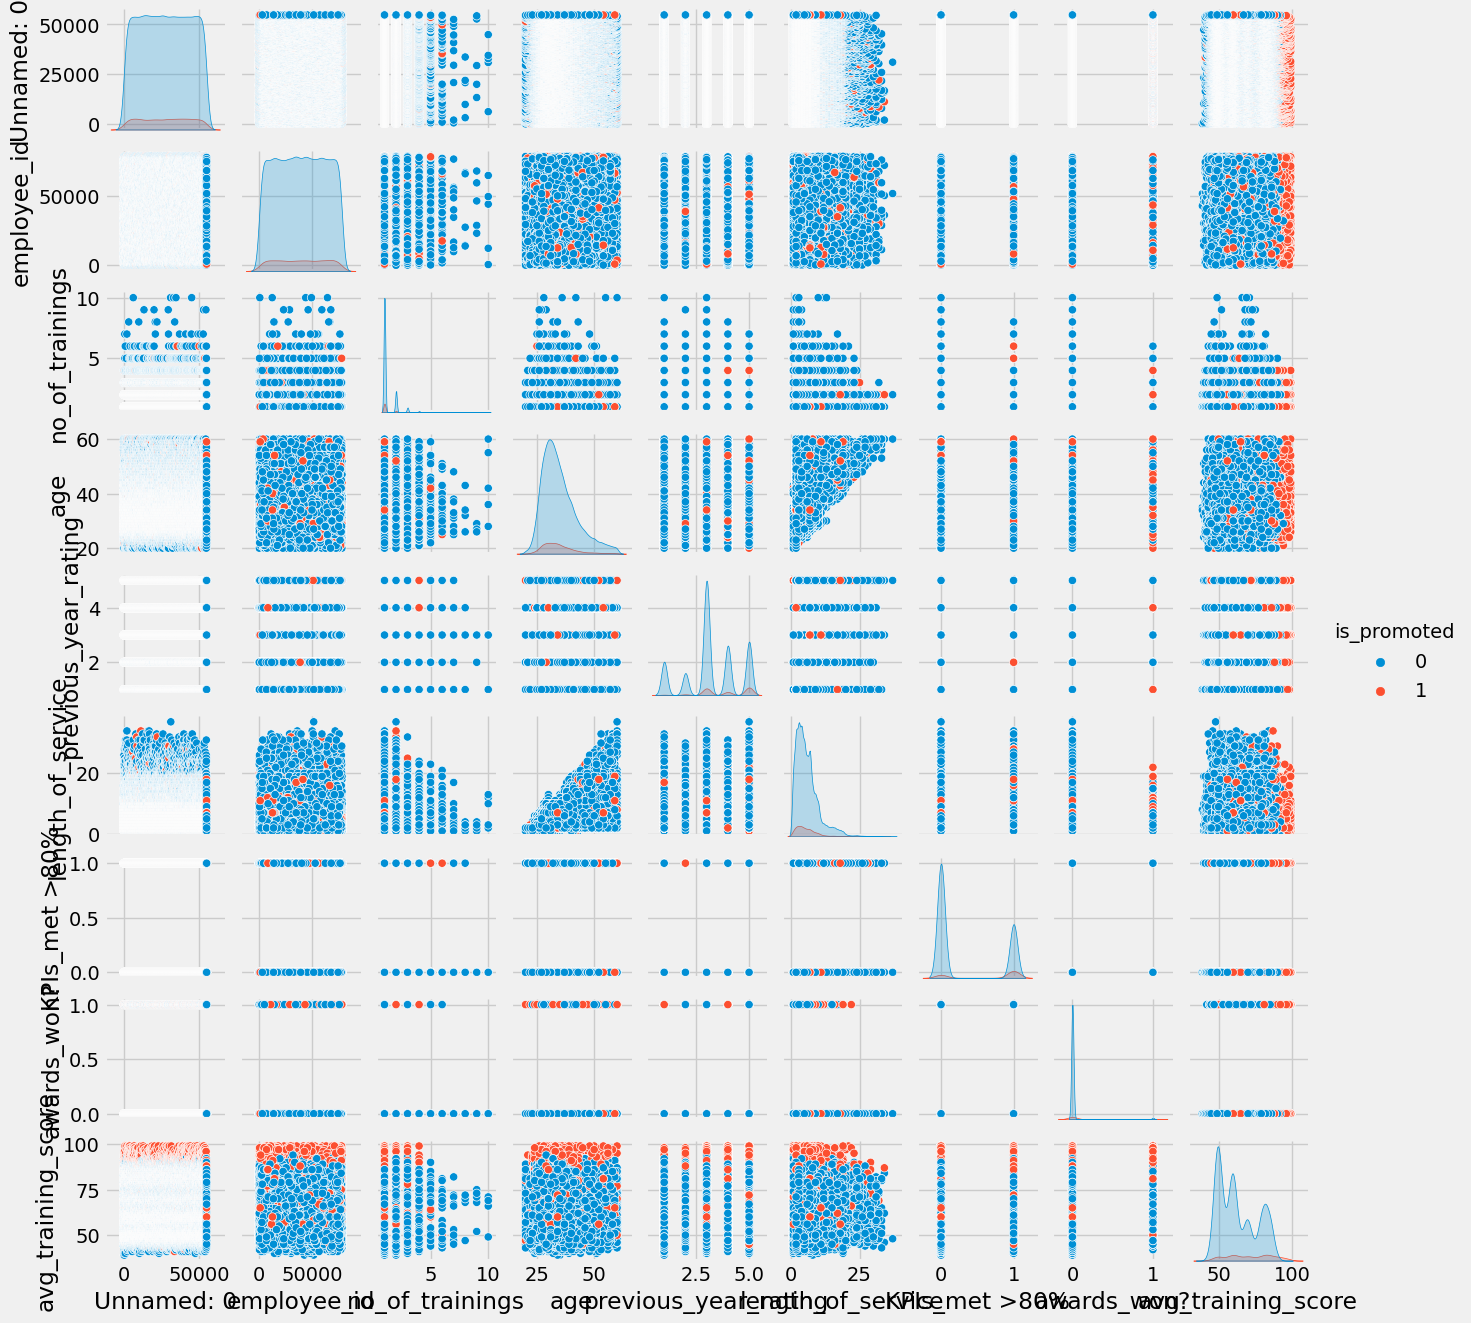

In [ ]:
sns.pairplot(df_fna, hue='is_promoted', size=1.5);

In [ ]:
df_fna = df_fna.drop(['Unnamed: 0','employee_id'], axis=1)
df_fna['num_education'] = df_fna['education'].replace(("Master's & above","Bachelor's","Below Secondary"), (3,2,1))
df_fna.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,num_education
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,3
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,2
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,2
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,2
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,2


#Quantitative to Quantitative Features

In [ ]:
quant_features = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','num_education']

In [ ]:
qual_features = ['department','region','education','gender','recruitment_channel','KPIs_met >80%', 'awards_won?']

In [ ]:
qual_df = df_fna[qual_features]

Pearson Correlation

Text(0.5, 1.0, 'Pearson Correlation Coefficients Between Quantitative Features')

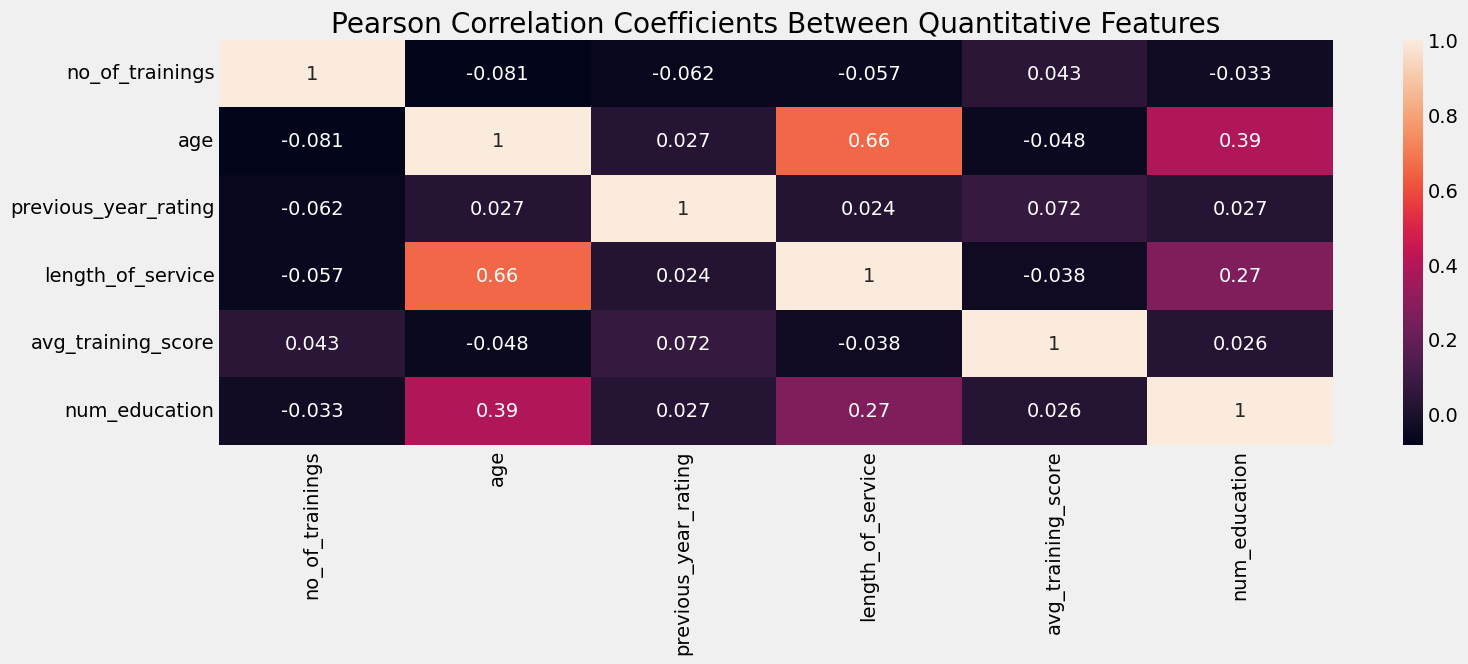

In [ ]:
quant_df = df_fna[quant_features]
corr = quant_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Pearson Correlation Coefficients Between Quantitative Features')

Spearman Correlation

In [ ]:
corr, p_values = scipy.stats.spearmanr(quant_df)
print(corr, p_values)

[[ 1.         -0.08567735 -0.05737462 -0.05689234  0.05267562 -0.03218929]
 [-0.08567735  1.          0.0479632   0.64444423 -0.04100127  0.43804417]
 [-0.05737462  0.0479632   1.          0.05026114  0.07504108  0.03172715]
 [-0.05689234  0.64444423  0.05026114  1.         -0.02886044  0.29199543]
 [ 0.05267562 -0.04100127  0.07504108 -0.02886044  1.          0.02720511]
 [-0.03218929  0.43804417  0.03172715  0.29199543  0.02720511  1.        ]] [[0.00000000e+00 8.24159484e-90 3.39340216e-41 1.55687640e-40
  5.49965272e-35 4.78511044e-14]
 [8.24159484e-90 0.00000000e+00 2.74725415e-29 0.00000000e+00
  7.78997572e-22 0.00000000e+00]
 [3.39340216e-41 2.74725415e-29 0.00000000e+00 5.32299580e-32
  2.81908782e-69 1.09109309e-13]
 [1.55687640e-40 0.00000000e+00 5.32299580e-32 0.00000000e+00
  1.40100785e-11 0.00000000e+00]
 [5.49965272e-35 7.78997572e-22 2.81908782e-69 1.40100785e-11
  0.00000000e+00 1.88966226e-10]
 [4.78511044e-14 0.00000000e+00 1.09109309e-13 0.00000000e+00
  1.88966226

<Axes: >

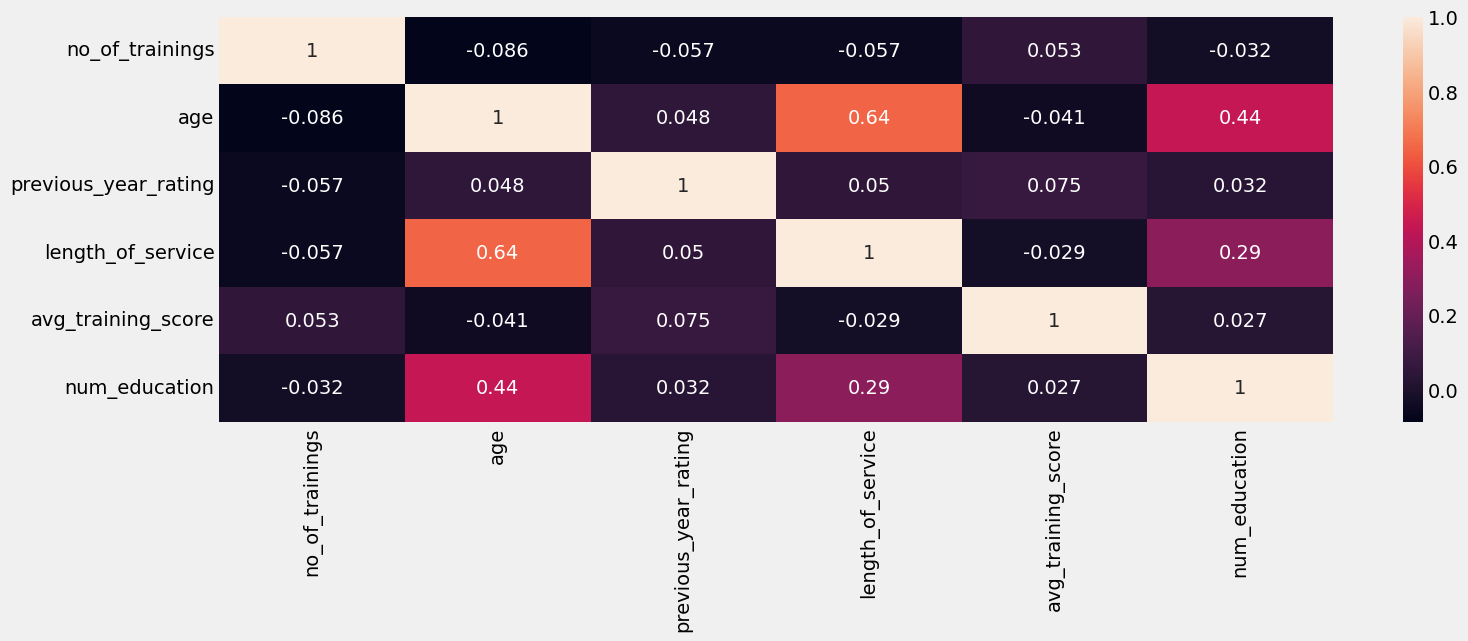

In [ ]:
quant_df = df_fna[quant_features]
corr = quant_df.corr(method = 'spearman')
sns.heatmap(corr, annot=True)

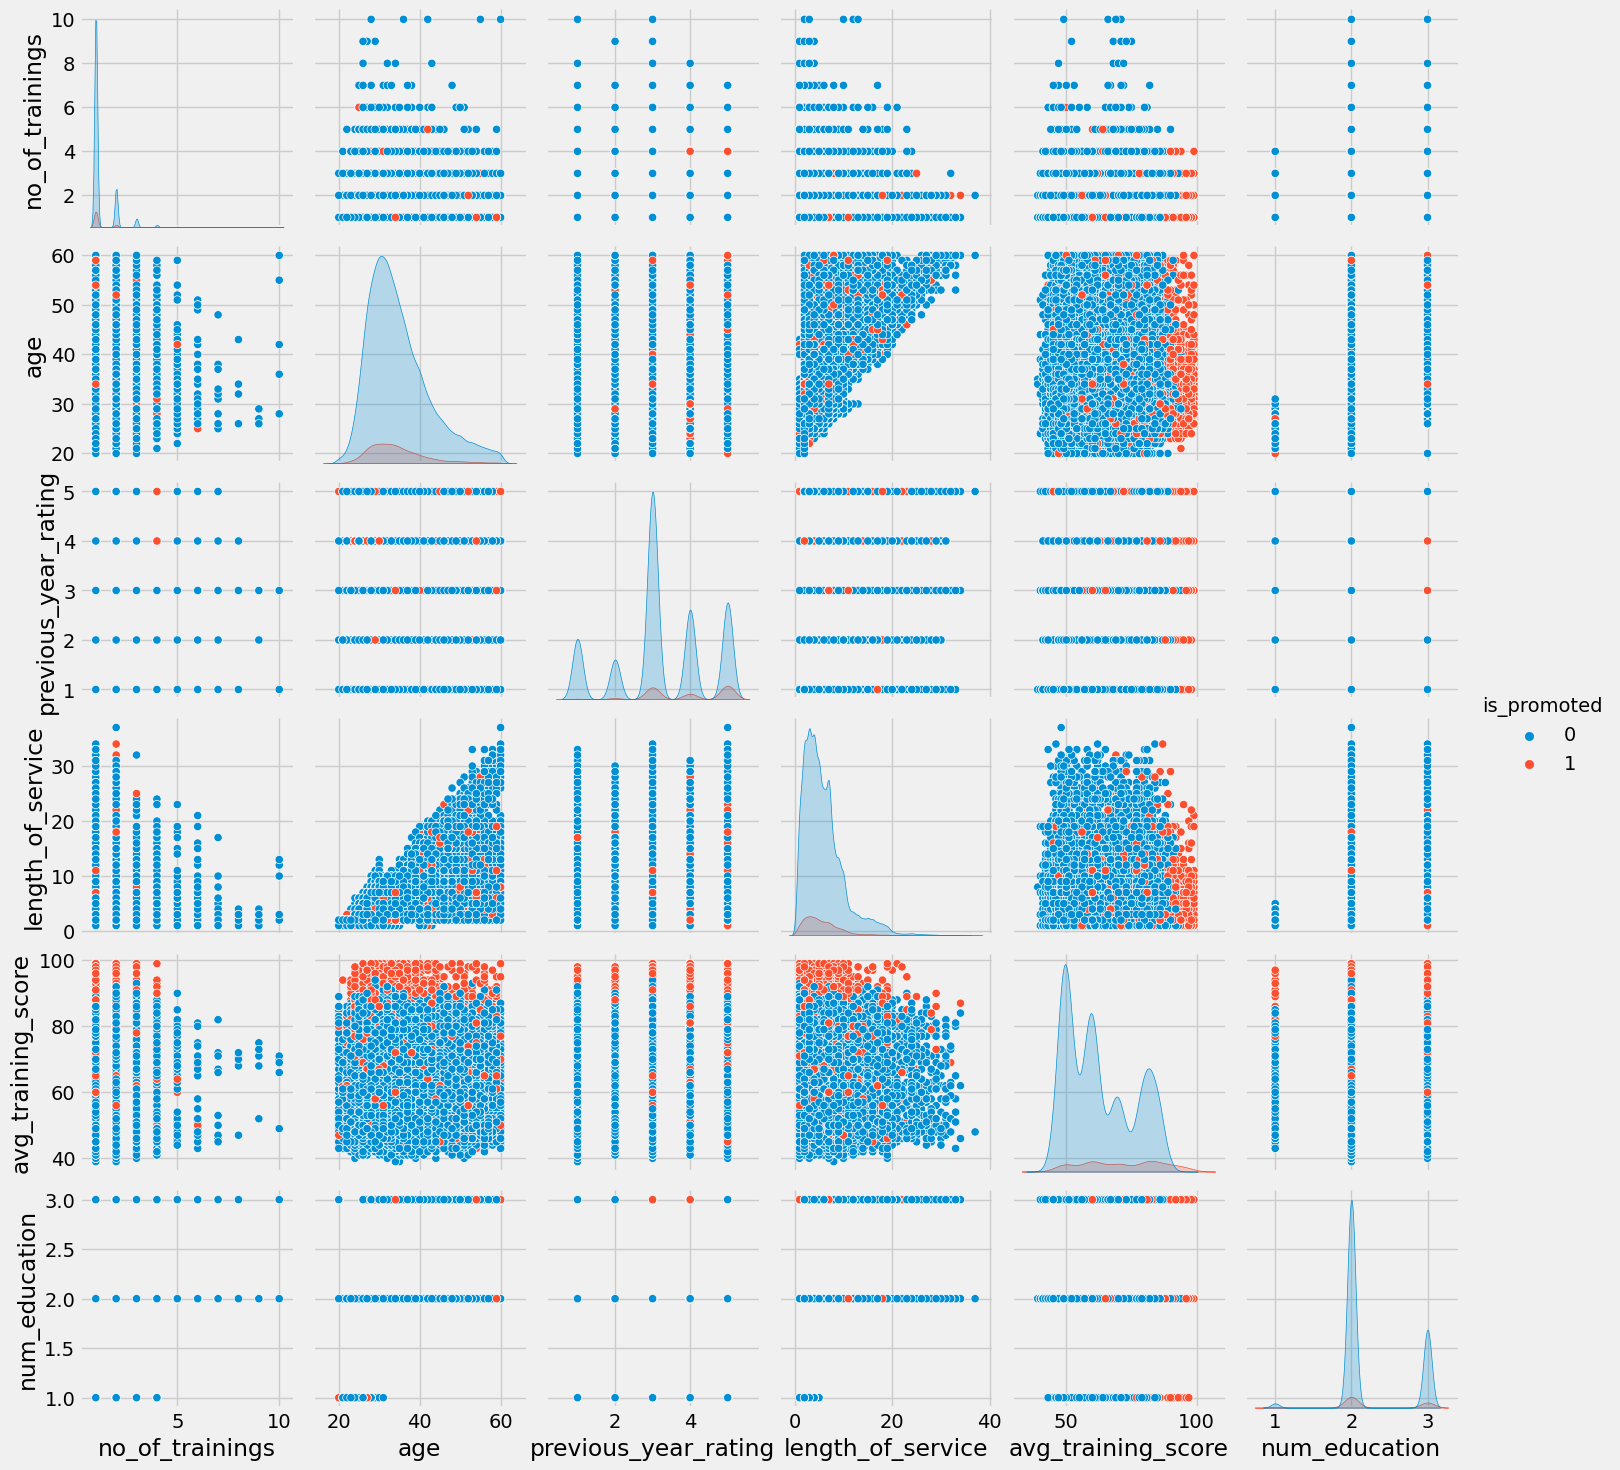

In [ ]:
df_quantandtarget = pd.concat([quant_df, df_fna['is_promoted']], axis = 1)
sns.pairplot(df_quantandtarget, hue='is_promoted');

##Quantitative to Qualitative Features

ANOVA

Kruskal-Wallis test

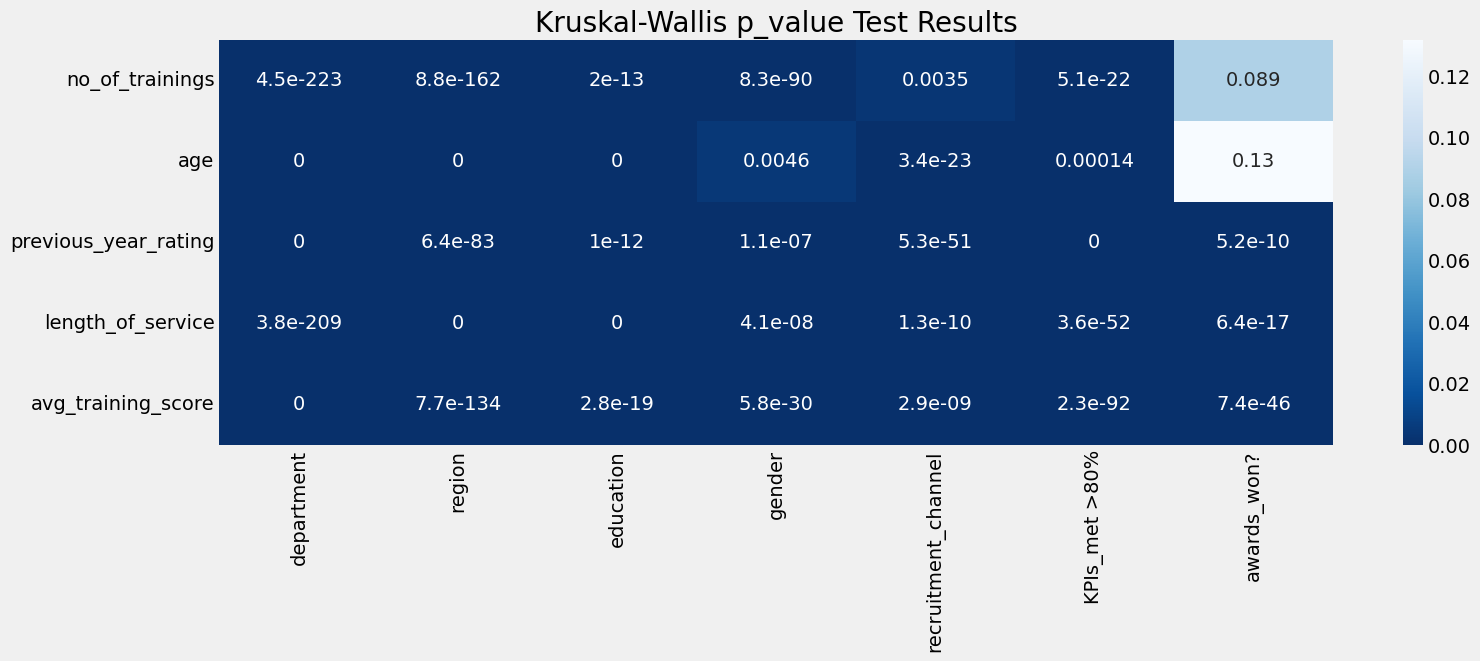

In [ ]:
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr ()
# Initialize the values in this matrix with 0
resultant_p = pd.DataFrame(index=quant_features, columns=qual_features, dtype=float)
resultant_p.drop('num_education', inplace=True)

for i in qual_features:
    for j in quant_features:
        if j != 'num_education':
          kruskal_args = tuple(df_fna.groupby(i)[j].apply(list).reset_index()[j])
          h_statistic, p_value = scipy.stats.kruskal(*kruskal_args)
          resultant_p.loc[j,i] = p_value


# Create a heatmap
fig = plt.figure()
sns.heatmap(resultant_p, annot=True, cmap='Blues_r')
plt.title('Kruskal-Wallis p_value Test Results')
plt.show()

In [ ]:
print('Kruskal_Wallis P Values to test target independence on quantitative features')
for i in quant_features:
  kruskal_args = tuple(df_fna.groupby('is_promoted')[i].apply(list).reset_index()[i])
  h_statistic, p_value = scipy.stats.kruskal(*kruskal_args)
  print(f'{i}: {p_value}')

Kruskal_Wallis P Values for target dependence on qualitative features
no_of_trainings: 1.425723449584848e-07
age: 0.011698138540257341
previous_year_rating: 3.1310466382410095e-271
length_of_service: 0.2381319161417078
avg_training_score: 0.0
num_education: 2.3813537670130892e-11


##Qualitative to Qualitative Features

Chi-square test

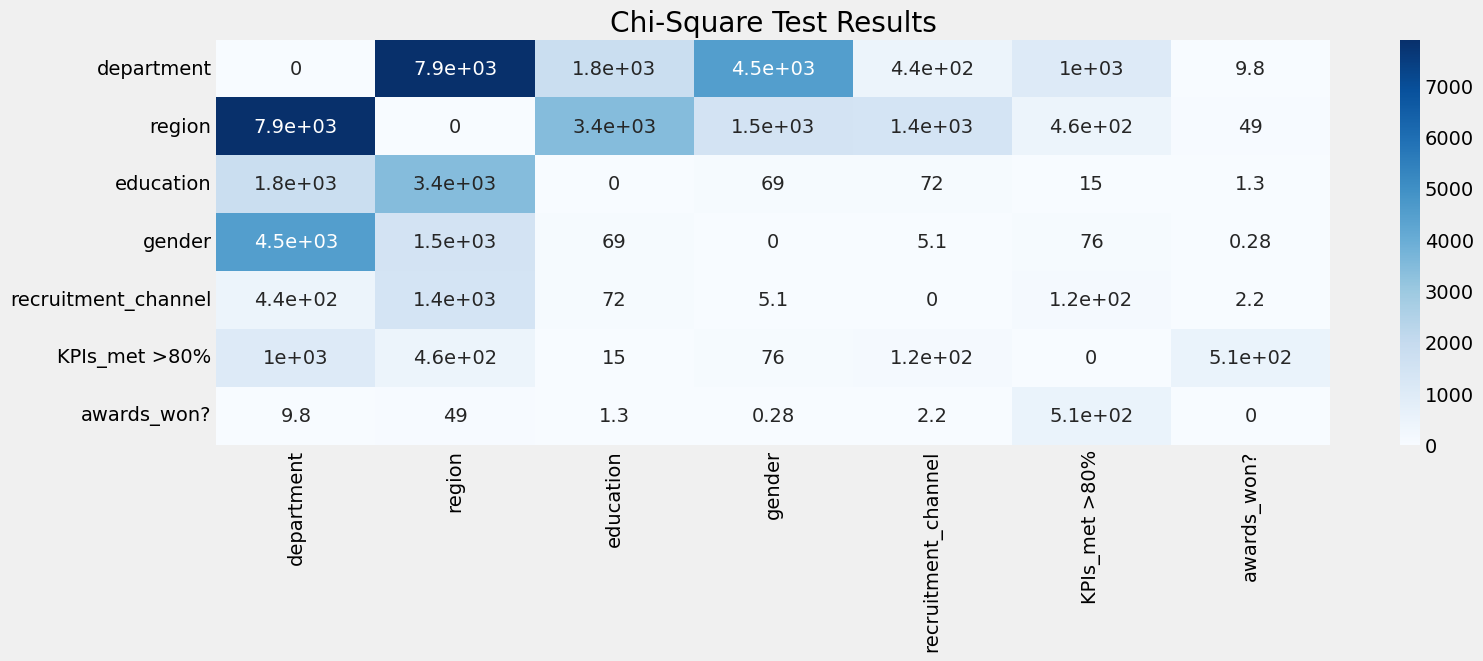

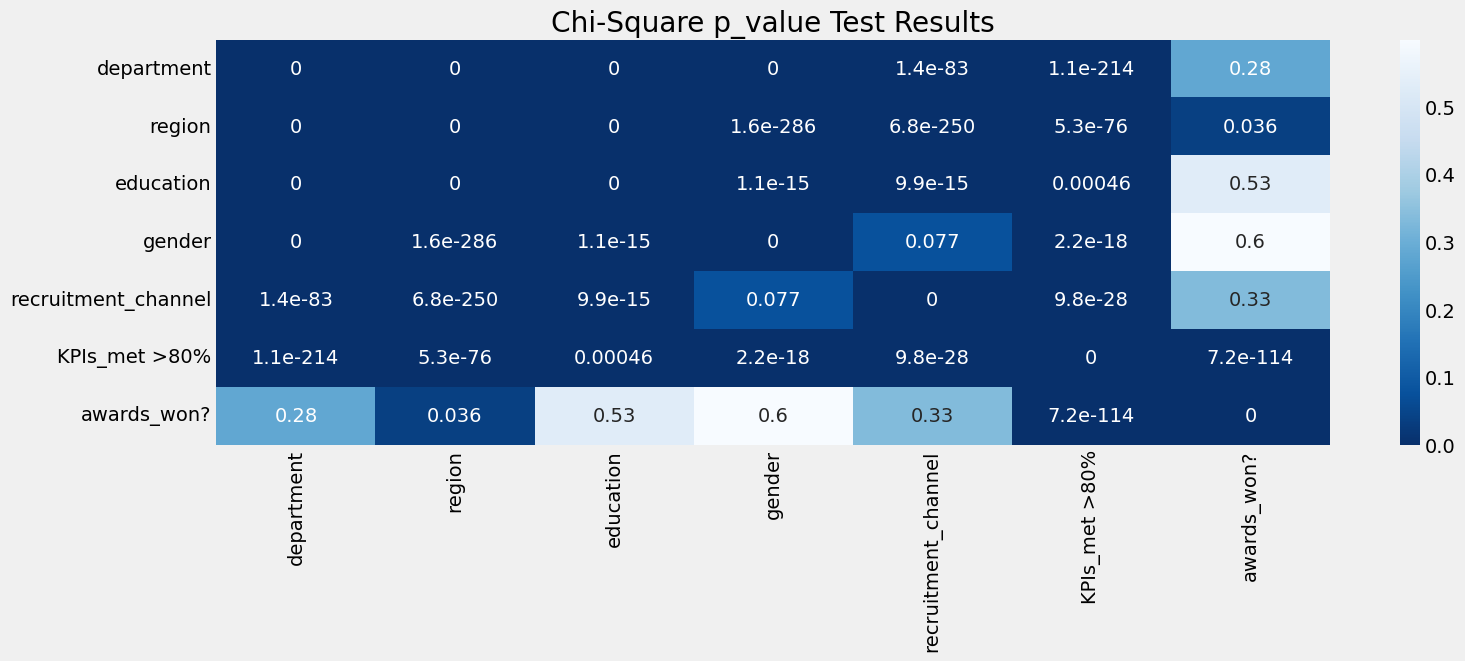

In [ ]:
from scipy.stats import chi2_contingency

# Load Dataset
df = qual_df

# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr ()
# Initialize the values in this matrix with 0
resultant_p = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], columns=list(df.columns))
resultant_p.set_index(pd.Index(list(df.columns)), inplace=True)

resultant_chi2 = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], columns=list(df.columns))
resultant_chi2.set_index(pd.Index(list(df.columns)), inplace=True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
          contingency_table = pd.crosstab(df[i], df[j])
          chi2, p, dof, expected = chi2_contingency(contingency_table)
          resultant_p.loc[i,j] = p
          resultant_chi2.loc[i,j] = chi2
          #print(contingency_table)

# Create a heatmap
fig = plt.figure()
sns.heatmap(resultant_chi2, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()
# Create a heatmap
fig = plt.figure()
sns.heatmap(resultant_p, annot=True, cmap='Blues_r')
plt.title('Chi-Square p_value Test Results')
plt.show()

## Look at chi2 pvalues for target dependence on categorical features

In [ ]:
qual_df = df_fna[qual_features]
for feature in qual_features:
  chi_square_args = pd.crosstab(df_fna[feature],df_fna['is_promoted']).values
  _, p_value, _, _ = scipy.stats.chi2_contingency(chi_square_args)
  print(f'{feature}: {p_value}')

department: 9.882497107474632e-29
region: 7.275378205784026e-80
education: 5.3808089671607115e-11
gender: 0.009765091521176657
recruitment_channel: 6.650937825577018e-05
KPIs_met >80%: 0.0
awards_won?: 0.0
